# Import Libraries

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization

from keras.optimizers import Adam
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score, classification_report,



# Read Data

In [42]:
df = pd.read_csv('/content/Robo.csv')
df.head()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V16,V17,V18,V19,V20,V21,V22,V23,V24,Class
0,1,0.438,0.498,3.625,3.645,5.0,2.918,5.0,2.351,2.332,...,0.593,0.502,0.493,0.504,0.445,0.431,0.444,0.440,0.429,4
1,2,0.438,0.498,3.625,3.648,5.0,2.918,5.0,2.637,2.332,...,0.592,0.502,0.493,0.504,0.449,0.431,0.444,0.443,0.429,4
2,3,0.438,0.498,3.625,3.629,5.0,2.918,5.0,2.637,2.334,...,0.593,0.502,0.493,0.504,0.449,0.431,0.444,0.446,0.429,4
3,4,0.437,0.501,3.625,3.626,5.0,2.918,5.0,2.353,2.334,...,0.593,0.502,0.493,0.504,0.449,0.431,0.444,0.444,0.429,4
4,5,0.438,0.498,3.626,3.629,5.0,2.918,5.0,2.640,2.334,...,0.592,0.502,0.493,0.504,0.449,0.431,0.444,0.441,0.429,4


In [43]:
df.drop(columns='id', inplace=True)

In [44]:
df.shape

(5456, 25)

In [46]:
df.isna().sum()

,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0
V10,0


# Split Data

In [47]:
X = df.drop('Class', axis=1)
y = df['Class'] - 1
X.shape, y.shape

((5456, 24), (5456,))

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [50]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# MLP Model

In [51]:
model = Sequential()

model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Dense(32, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Dense(16, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Dense(4, activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [52]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_17 (Dense)                     │ (None, 64)                  │           1,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 16)                  │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 4)                   │              68 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,724 (18.45 KB)

 Trainable params: 4,500 (17.58 KB)

 Non-trainable params: 224 (896.00 B)

# Model Training


In [53]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [54]:
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=1)


Epoch 1/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 9s 43ms/step - accuracy: 0.3117 - loss: 1.7786 - val_accuracy: 0.4960 - val_loss: 1.1929
Epoch 2/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.4831 - loss: 1.2269 - val_accuracy: 0.5395 - val_loss: 1.0864
Epoch 3/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5454 - loss: 1.0841 - val_accuracy: 0.6518 - val_loss: 0.9069
Epoch 4/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6221 - loss: 0.9414 - val_accuracy: 0.6987 - val_loss: 0.7803
Epoch 5/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6116 - loss: 0.9184 - val_accuracy: 0.7320 - val_loss: 0.7097
Epoch 6/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6481 - loss: 0.8514 - val_accuracy: 0.7583 - val_loss: 0.6567
Epoch 7/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6708 - loss: 0.8267 - val_accuracy: 0.7491 - val_loss: 0.6338
Epoch 8/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7027 - loss: 0.7738 - val_acc

# Model Evaluation

In [55]:
# Evaluate on test data
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f'loss: {loss}')
print(f'accuracy: {accuracy}')

loss: 0.23894956707954407
accuracy: 0.9212453961372375


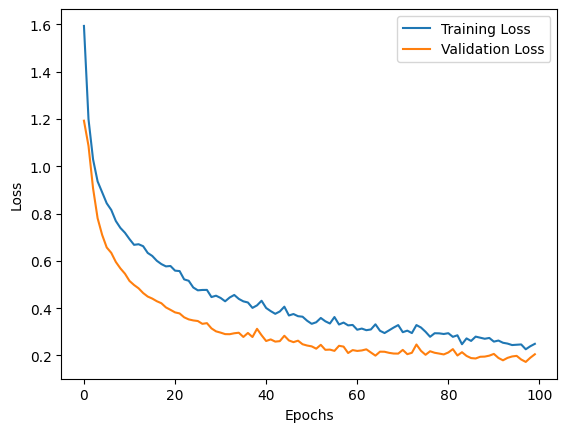

In [56]:
# Plot loss over epochs
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [57]:
y_pred = np.argmax(model.predict(X_test), axis=1)
print(classification_report(y_pred, y_test))

35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step
              precision    recall  f1-score   support

           0       0.95      0.89      0.92       486
           1       0.92      0.97      0.94       404
           2       0.83      0.98      0.90        51
           3       0.89      0.89      0.89       151

    accuracy                           0.92      1092
   macro avg       0.90      0.93      0.91      1092
weighted avg       0.92      0.92      0.92      1092



In [58]:
model.save('robo_mlp_model.h5')